In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('Retail_Sales.csv')

In [4]:
data.head()

,transactions_id,sale_date,sale_time,customer_id,gender,age,category,quantiy,price_per_unit,cogs,total_sale
0,180,2022-11-05,10:47:00,117,Male,41.0,Clothing,3.0,300.0,129.0,900.0
1,522,2022-07-09,11:00:00,52,Male,46.0,Beauty,3.0,500.0,145.0,1500.0
2,559,2022-12-12,10:48:00,5,Female,40.0,Clothing,4.0,300.0,84.0,1200.0
3,1180,2022-01-06,08:53:00,85,Male,41.0,Clothing,3.0,300.0,129.0,900.0
4,1522,2022-11-14,08:35:00,48,Male,46.0,Beauty,3.0,500.0,235.0,1500.0


# Calculate the NULL values

In [6]:

data.isna().sum()

transactions_id     0
sale_date           0
sale_time           0
customer_id         0
gender              0
age                10
category            0
quantiy             3
price_per_unit      3
cogs                3
total_sale          3
dtype: int64

# Fill the NULL Values

In [10]:
medium_age= data['age'].median()
data['age'] = data['age'].fillna(medium_age)

In [12]:
data['quantiy'] = data['quantiy'].fillna(data['quantiy'].median())


In [14]:
data['cogs'] = data['cogs'].fillna(data['cogs'].median())


In [19]:
data['price_per_unit'] = data['price_per_unit'].fillna(data['price_per_unit'].median())


In [20]:
data['total_sale'] = data['total_sale'].fillna(data['quantiy'] * data['price_per_unit'])


# Checking Null Values

In [21]:
data.isnull().sum()

transactions_id    0
sale_date          0
sale_time          0
customer_id        0
gender             0
age                0
category           0
quantiy            0
price_per_unit     0
cogs               0
total_sale         0
dtype: int64

# BUSINESS PROBLEM

 # 1Q.What is the overall revenue and profit of the company?

In [30]:
total_revenue = data['total_sale'].sum()
total_profit = (data['total_sale'] - data['cogs']).sum()

print("total_revenue=",total_revenue)
print("total_profit=",total_profit)

total_revenue= 912170.0
total_profit= 722324.7999999999


In [ ]:
Business Insight:
This shows the financial health of the business.
Positive profit means the company is operating successfully; negative profit indicates cost or pricing issues.

# 2Q.How does sales performance change month by month?

In [32]:
data['sale_date'] = pd.to_datetime(data['sale_date'])
monthly_sales = data.groupby(data['sale_date'].dt.to_period('M'))['total_sale'].sum()
monthly_sales


sale_date
2022-01    22635.0
2022-02    16260.0
2022-03    24505.0
2022-04    28705.0
2022-05    24980.0
2022-06    20700.0
2022-07    22345.0
2022-08    21345.0
2022-09    61770.0
2022-10    68235.0
2022-11    68915.0
2022-12    72880.0
2023-01    23790.0
2023-02    25170.0
2023-03    20530.0
2023-04    21925.0
2023-05    27010.0
2023-06    24555.0
2023-07    35925.0
2023-08    28270.0
2023-09    67560.0
2023-10    57880.0
2023-11    57135.0
2023-12    69145.0
Freq: M, Name: total_sale, dtype: float64

In [ ]:
Business Insight:
Monthly trend helps identify peak seasons and slow periods, supporting inventory and marketing planning.

# 3Q.Which product category generates the highest revenue?

In [33]:
category_sales = data.groupby('category')['total_sale'].sum().sort_values(ascending=False)
category_sales


category
Electronics    313810.0
Clothing       311220.0
Beauty         287140.0
Name: total_sale, dtype: float64

In [ ]:
Business Insight:
High-revenue categories are the main growth drivers and should receive priority in promotions and stock planning

# 4Q.Which category is most profitable?

In [36]:
data['profit'] = data['total_sale'] - data['cogs']
category_profit = data.groupby('category')['profit'].sum().sort_values(ascending=False)
category_profit


category
Clothing       246802.00
Electronics    246647.65
Beauty         228875.15
Name: profit, dtype: float64

In [ ]:
Business Insight:
This shows which categories give the highest margin, not just high sales, helping in pricing and product strategy.

# 5Q.Who are the highest value customers?

In [37]:
top_customers = data.groupby('customer_id')['total_sale'].sum().sort_values(ascending=False).head(10)
top_customers


customer_id
3     38440.0
1     30750.0
5     30405.0
2     25295.0
4     23580.0
87    15855.0
54    13475.0
71    12790.0
55    12080.0
84    11730.0
Name: total_sale, dtype: float64

In [ ]:
Business Insight:
A small group of customers contributes a large share of revenue and should be targeted with loyalty programs.

# 6Q.Which gender group contributes more to sales?

In [38]:
gender_sales = data.groupby('gender')['total_sale'].sum()
gender_sales


gender
Female    465850.0
Male      446320.0
Name: total_sale, dtype: float64

In [ ]:
Business Insight:
Helps in customer segmentation and planning targeted marketing campaigns.

# 7Q.Which age group spends the most?

In [40]:
age_sales = data.groupby('age')['total_sale'].sum().sort_values(ascending=False)
age_sales


age
43.0    35940.0
34.0    33570.0
51.0    32055.0
19.0    29690.0
26.0    27960.0
22.0    27400.0
46.0    26180.0
21.0    25170.0
47.0    25010.0
37.0    23300.0
35.0    22580.0
18.0    22490.0
38.0    22200.0
60.0    21180.0
42.0    20490.0
31.0    20440.0
54.0    20010.0
25.0    19800.0
50.0    19690.0
30.0    19580.0
55.0    19560.0
53.0    19020.0
59.0    18940.0
56.0    18880.0
27.0    18770.0
40.0    18755.0
57.0    18580.0
63.0    18500.0
64.0    18250.0
36.0    18210.0
28.0    17340.0
20.0    17290.0
23.0    16440.0
62.0    16240.0
44.0    15120.0
58.0    14550.0
48.0    14480.0
52.0    14080.0
61.0    13460.0
29.0    13140.0
45.0    12650.0
33.0    12540.0
41.0    11300.0
32.0    11100.0
24.0    10830.0
49.0    10220.0
39.0     9190.0
Name: total_sale, dtype: float64

# 8Q.How does total sales change month by month?

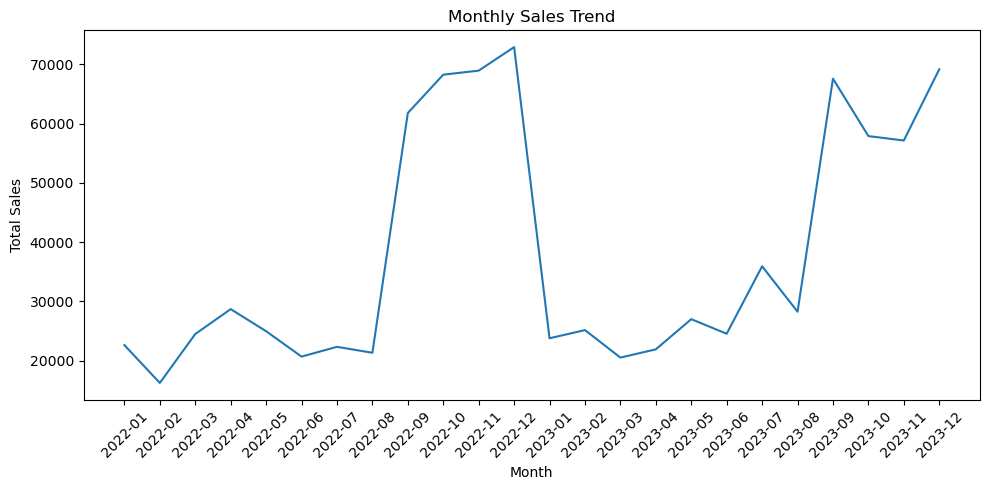

In [42]:
monthly_sales = data.groupby(data['sale_date'].dt.to_period('M'))['total_sale'].sum().reset_index()
monthly_sales['sale_date'] = monthly_sales['sale_date'].astype(str)

plt.figure(figsize=(10,5))
sns.lineplot(x='sale_date', y='total_sale', data=monthly_sales)
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

# 9Q.Which product category generates the highest revenue?

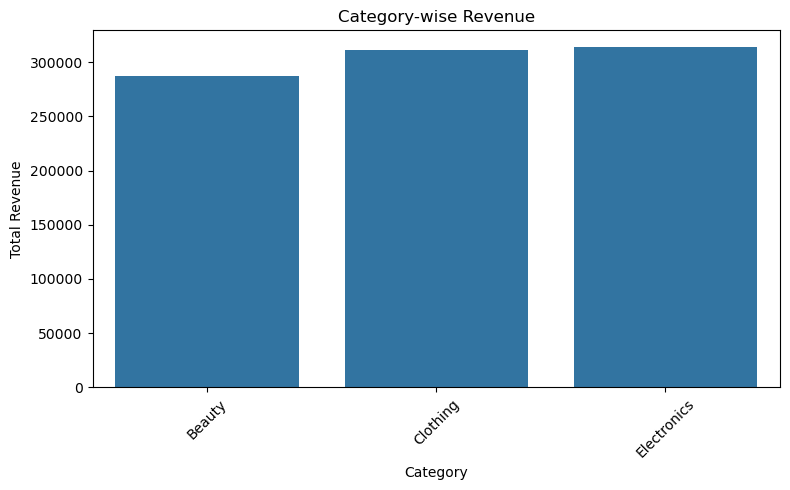

In [43]:
category_sales = data.groupby('category')['total_sale'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='category', y='total_sale', data=category_sales)
plt.xticks(rotation=45)
plt.title("Category-wise Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()


# 10Q.Which category is the most profitable?

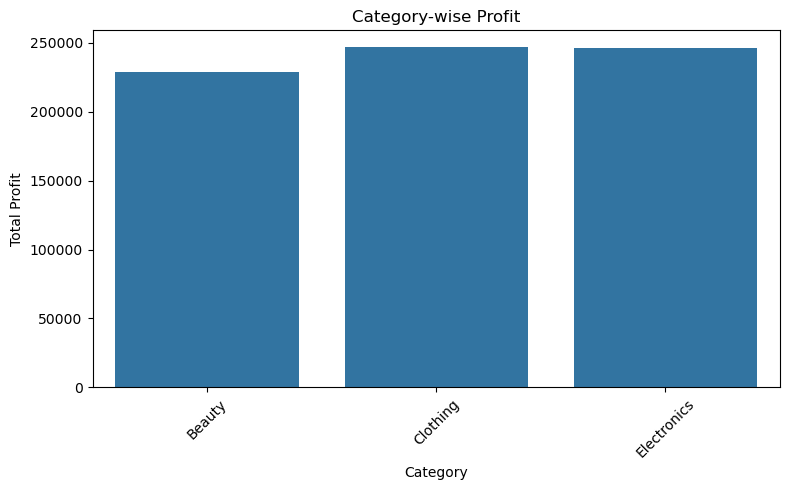

In [45]:
data['profit'] = data['total_sale'] - data['cogs']
category_profit = data.groupby('category')['profit'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x='category', y='profit', data=category_profit)
plt.xticks(rotation=45)
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()


#  11Q.Which gender contributes more to total sales?

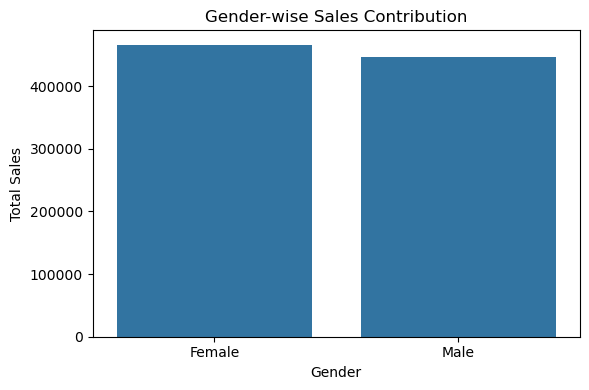

In [50]:
gender_sales = data.groupby('gender')['total_sale'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='gender', y='total_sale', data=gender_sales)
plt.title("Gender-wise Sales Contribution")
plt.xlabel("Gender")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


#  12Q.Who are the top revenue-generating customers?

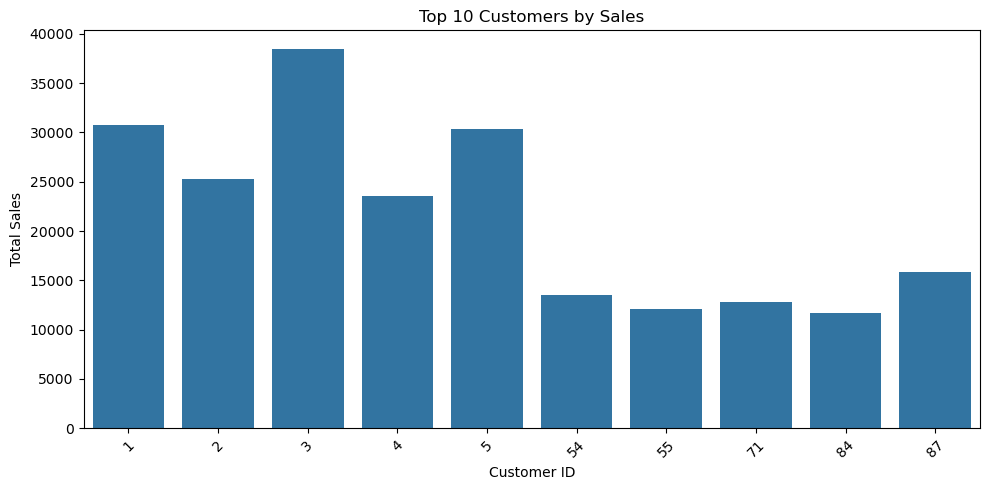

In [52]:
top_customers = data.groupby('customer_id')['total_sale'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='customer_id', y='total_sale', data=top_customers)
plt.xticks(rotation=45)
plt.title("Top 10 Customers by Sales")
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()
